****
#  Decision Tree & Random Forest


### Présentation
> Ce notebook a pour vocation de montrer les commandes élémentaire en ce qui concerne les Decision Tree et Random Forest avec la bibliothèque Scikit Learn.     
Quelques liens sont données en fin de notebook pour aller plus loin.

> Ce notebook représente un TD de l'excellente       
**Ekaterina Flin**, *ingénieur en informatique, groupe EpiMed, Institut pour l’Avancée des Biosciences (IAB), Université Grenoble Alpes (UGA)*
Vidéo youtube :       
https://www.youtube.com/watch?v=ydk1mUqwsVQ
*****

In [1]:
# Importation des librairies nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importation des données
df = pd.read_csv("colon_cancer.csv",sep=";",index_col = "id_sample")
df

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
id_sample,,,,,,,,,,,,,,,,,,,,,
EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,5.528371,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPSM-COLON-0800,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360521,2.954865,1.708999,...,4.643061,4.632634,4.670141,4.571678,2.864645,2.336317,6.923562,2.710594,2.507989,tumoral
EPSM-COLON-0801,3.691606,2.118165,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,2.215480,...,4.695878,1.800088,7.647285,1.340236,3.063140,3.410137,3.856952,1.491817,6.493643,tumoral
EPSM-COLON-0802,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,2.833854,...,4.886197,3.624820,3.912746,2.806374,3.170815,0.775487,4.952383,1.960087,2.809510,tumoral


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, EPSM-COLON-0001 to EPSM-COLON-0804
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ADH1C          804 non-null    float64
 1   DHRS11         804 non-null    float64
 2   UGP2           804 non-null    float64
 3   SLC7A5         804 non-null    float64
 4   CTSS           804 non-null    float64
 5   DAO            804 non-null    float64
 6   NIBAN1         804 non-null    float64
 7   PRUNE2         804 non-null    float64
 8   FOXF2          804 non-null    float64
 9   TENT5C         804 non-null    float64
 10  KLF10          804 non-null    float64
 11  FABP1          804 non-null    float64
 12  RPSAP19        804 non-null    float64
 13  NCAPH          804 non-null    float64
 14  TPM1           804 non-null    float64
 15  PLA2G12B       804 non-null    float64
 16  PLAAT4         804 non-null    float64
 17  IGLV8-61       804 non-null    fl

In [4]:
# Fonction permettant de calculer la métriques accuracy_score (le % d'élément bien prédit)
# Et le classifier => Calculer sur les données d'apprentissage, permettant d'obtenir les prédictions
# Pour que cette fonction soit opérationnelle, le classifier doit être déterminé en amont

def calculate_accuracy(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print('Train accuracy:', '{:.3f}'.format(accuracy_train), 'Test accuracy:', '{:.3f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier

In [5]:
# Permet de figer le noyau alétoire pour avoir les mêmes données que l'exercice
random_state = 42

## Construction des matrices X et Y

In [6]:
Y = df["tissue_status"]
X = df.drop(columns=["tissue_status"])

## Construction d'un dataset d'entraînement de 3/4 et un dataset de test de 1/4

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = random_state,stratify = Y)

In [8]:
print("X_train :" , X_train.shape , " X_test :", X_test.shape)

X_train : (603, 60)  X_test : (201, 60)


In [9]:
y_train.value_counts()

tumoral    302
normal     301
Name: tissue_status, dtype: int64

## Création, entraînement et visualisation d'un arbre de décision

In [10]:
# Création du classifier (arbre de décision) et appel de la fonction 'calculate_accuracy'

classifier = DecisionTreeClassifier(max_depth =2, random_state = random_state, criterion = 'entropy')
acuracy_train , accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train, X_test, y_train, y_test)

Train accuracy: 1.000 Test accuracy: 0.975


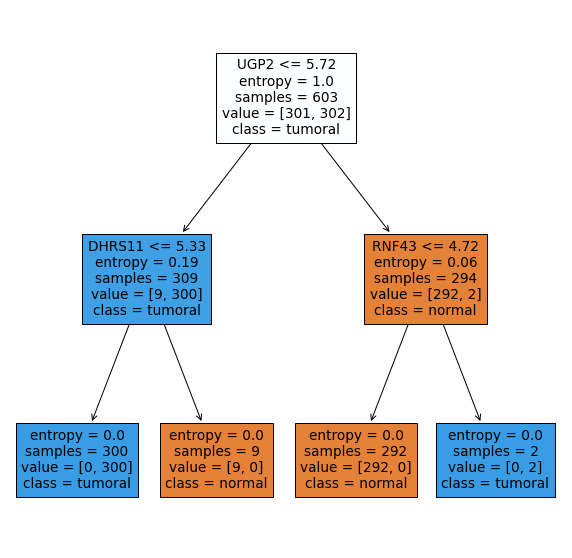

In [11]:
# Représentation graphique d'un arbre de décision de profondeur 2 branches

plt.figure(figsize = (10,10))
plot_tree(classifier,feature_names = list(X_train.columns), class_names = Y.unique(), precision = 2, filled = True)
plt.show()

### Interprétation
>La variable 'UGP2' est la variable la plus discriminante elle separe le jeu de données en 2 parties presque égale 301 et 302 et ne fait que 11 erreurs, d'un coté 2 et 9 de l'autre, c'est une dichotomie presque parfaite.      
Les 2 autres varibles permettent simplement de gérer les 11 erreurs de classement initial

### Calcul de matrice de confusion

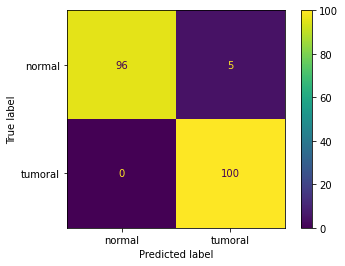

In [12]:
metrics.plot_confusion_matrix(trained_classifier, X_test, y_test)

## Création d'un modèle de Random Forest avec 20 arbres

> La méthode de Random Forest crée une série d'arbre de décision (une forêt). Chaque arbre prend en compte une partie de features tirés au hasard.      
Le résultat final est établie par un vote entre tous les arbres (la majorité gagne).    
Pour entraîner un modèle de Random Forest, On utilise la lasse **RandomForestClassifier** de scikit-learn.     
La profondeur de chaque arbre est définie par l'option *max_depth*. Le nombre d'arbresdans la forêt est controlé par l'option *n_estimators*.

In [13]:
# # Création du classifier (Random forest) et appel de la fonction 'calculate_accuracy'

classifier = RandomForestClassifier (max_depth = 2, random_state = random_state, criterion = 'entropy',n_estimators = 20)
accuracy_train , accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train, X_test, y_train, y_test)

Train accuracy: 0.998 Test accuracy: 0.995


#### Matrice de confusion

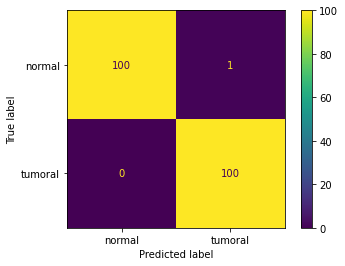

In [14]:
# Affichage de la matrice de confusion
metrics.plot_confusion_matrix(trained_classifier, X_test, y_test)

****
#### Conclusion
>Les 2 methodes donnent des résultats différents, l'arbre de décision est instable et produit du suraprentissage, ca ne se voit pas trop dans cette exercice car les données ont été préparé.
La forêt aléatoire produit moins de surapprentissage, donnent des résultats plus stable et de meilleur qualité, ceci est une vérité générale, c'etait le but de ce TD.
*****

## Les autres métriques  

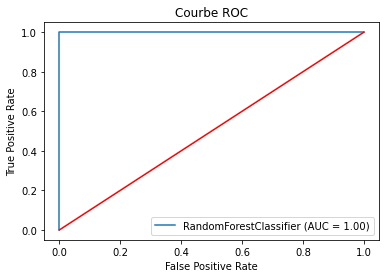

In [15]:
# La courbe ROC

metrics.plot_roc_curve(estimator=trained_classifier, X=X_test, y=y_test)  

# Construire la diagonale de référence
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'r')

plt.title("Courbe ROC")
plt.show()

In [16]:
y_predict_test = classifier.predict(X_test)
report = metrics.classification_report(y_true = y_test , y_pred = y_predict_test,target_names = Y.unique())
print(report)

              precision    recall  f1-score   support

      normal       1.00      0.99      1.00       101
     tumoral       0.99      1.00      1.00       100

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



#### Ref *plot_tree* : 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=decision_tree

#### Ref *fit method* :
https://scikit-learn.org/stable/developers/develop.html#:~:text=The%20fit()%20method%20takes,reference%20to%20X%20and%20y%20.

#### Ref *RandomRorestClassifier* :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier.apply

#### Ref *métrique de précision* :
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics       
https://scikit-learn.org/stable/search.html?q=metrics.plot

#### Ref *accuracy_score* :
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=metrics%20accuracy_score